In [55]:
from os import listdir, getcwd
import cv2 as cv
import numpy as np
import time
from matplotlib import pyplot as plt

# Calculo de los momentos de Hu con normalizacion

In [2]:
def get7Moments(img):
    '''Calcular los momentos de Hu de la imagen'''

    img = cv.bitwise_not(img)
    hu = cv.HuMoments(cv.moments(img))

    for i in range(0, 7):
        hu[i] = -1 * np.sign(hu[i]) * np.log10(np.abs(hu[i]))
    
    hu = hu.reshape((1, 7)).tolist()[0]
    
    return hu

# Utilizando promedio de los momentos invariantes de Hu

In [8]:
def processImages(HUs):
    '''Recorrer las imagenes, calcular sus momentos y agregar los promedios al diccionario'''

    CWD = './'

    DIGITS = [0,1,2,3,4,5,6,7,8,9]

    # Recorrer los folders de los digitos
    for number in DIGITS:

        # Cronometro
        startTime = time.perf_counter()

        folder = CWD + str(number) + '/'

        # Ver los archivos del folder
        files = listdir(folder)
        
        # Contenedores de los momentos de Hu de las imagenes del folder
        momento1 = []
        momento2 = []
        momento3 = []
        momento4 = []
        momento5 = []
        momento6 = []
        momento7 = []

        # Recorremos los archivos del folder
        for file in files:
            
            # Leer imagen
            img = cv.imread(folder + file,0)

            # Calcular los momentos de la imagen
            momentos = get7Moments(img)
           
            # Agregar cada momento a cada lista para poder calcular sus promedios al final
            momento1 += [ momentos[0] ]
            momento2 += [ momentos[1] ]
            momento3 += [ momentos[2] ]
            momento4 += [ momentos[3] ]
            momento5 += [ momentos[4] ]
            momento6 += [ momentos[5] ]
            momento7 += [ momentos[6] ]

        # Calcular el promedio de los momentos de Hu para este digito
        momentosHuDigito = [

            sum(momento1)/len(momento1),
            sum(momento2)/len(momento2),
            sum(momento3)/len(momento3),
            sum(momento4)/len(momento4),
            sum(momento5)/len(momento5),
            sum(momento6)/len(momento6),
            sum(momento7)/len(momento7)

        ]

        # Agregar promedio de momentos al diccionario
        HUs[number] = momentosHuDigito

        print("Procesado de " + str(number) + ': ' + str(time.perf_counter() - startTime) + " s (" + str(len(files)) + ")")

In [9]:
HUs = {}

processImages(HUs)

Procesado de 0: 1.747644600000001 s (324)
Procesado de 1: 1.577988399999981 s (280)
Procesado de 2: 1.7143596999999886 s (335)
Procesado de 3: 1.4354860999999914 s (285)
Procesado de 4: 1.3994758000000047 s (268)
Procesado de 5: 1.5128046999999754 s (319)
Procesado de 6: 1.4254363999999953 s (302)
Procesado de 7: 1.1222336999999811 s (225)
Procesado de 8: 1.6147941000000117 s (327)
Procesado de 9: 1.397500199999996 s (283)


In [10]:
for key in HUs.keys():

    print(HUs[key])


[2.2911103545816776, 4.775627880735936, 9.295021991149259, 9.473249438354163, 14.243214129107377, 8.448180460991495, 4.086399194545833]
[2.766375889029516, 5.623026329364049, 10.34110392823023, 10.893975022510478, 11.558697983581954, 4.74215881344458, 1.9777011072533262]
[2.232816529577102, 4.561228391043366, 7.665401329979087, 7.901826629748446, 14.906848084125437, 9.628599102691005, -0.26319807491791314]
[2.2693007638414326, 4.651689010958199, 8.073334604228357, 8.660154130038062, 4.197700318559253, 0.0811626191645329, -4.99471862799305]
[2.448267745060902, 5.195333953651214, 7.949905233787227, 8.734559587150269, 12.205472346092526, 7.79407731455259, 7.6437391018664345]
[2.2388046505447394, 4.604912888004722, 8.276494262781286, 8.610151707401021, 12.563218130975589, 7.141961543628056, 5.691139835787104]
[2.491025253847222, 5.1838949447216525, 8.138859842075922, 8.351719801705988, 16.465219662133283, 10.886421702436325, -17.156838620200443]
[2.443132971908916, 4.993680301909175, 8.268

In [23]:
testImg = cv.imread('./0.jpg',0)
momentos = get7Moments(testImg)

dif = []

for key in HUs.keys():

    dif += [sum(abs(np.array(momentos) - np.array(HUs[key])))]
    
pred = min(dif)

print(dif.index(pred))

4


# Calculando la suma de las diferencias de la imagen en cuestion con todas las imagenes de entrenamiento

In [79]:
def predict(inputImg):

    CWD = './'

    DIGITS = [0,1,2,3,4,5,6,7,8,9]

    avgs = np.array([])

    # Recorrer los folders de los digitos
    for number in DIGITS:

        # Cronometro
        startTime = time.perf_counter()

        folder = CWD + str(number) + '/'

        # Ver los archivos del folder
        files = listdir(folder)
        
        distances = []

        # Recorremos los archivos del folder
        for file in files:
            
            # Leer imagen
            img = cv.imread(folder + file,0)
            
            # Calculamos diferencia de los momentos invariantes de Hu entre ambas imagenes
            huDistance = cv.matchShapes(inputImg,img,cv.CONTOURS_MATCH_I2,0)
           
            # Agregarmos la distancia al arreglo
            distances += [huDistance]

        avg = np.mean(distances)

        avgs = np.append(avgs,avg)

        print("Procesado de " + str(number) + ': ' + str(round(time.perf_counter() - startTime,5)) + " s (" + str(len(files)) + ")")

    return np.argmin(avgs), avgs

Procesado de 0: 0.05987 s (324)
Procesado de 1: 0.04731 s (280)
Procesado de 2: 0.06084 s (335)
Procesado de 3: 0.05016 s (285)
Procesado de 4: 0.04782 s (268)
Procesado de 5: 0.05834 s (319)
Procesado de 6: 0.05566 s (302)
Procesado de 7: 0.03978 s (225)
Procesado de 8: 0.05967 s (327)
Procesado de 9: 0.04982 s (283)
Prediccion: 4


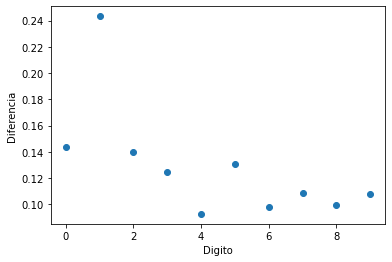

In [82]:
%matplotlib inline
testImg = cv.imread('./4.jpg',0)

momentos = get7Moments(testImg)

prediction, avgs = predict(testImg)

print("Prediccion:",prediction)

plt.scatter([0,1,2,3,4,5,6,7,8,9],avgs)
plt.ylabel('Diferencia')
plt.xlabel('Digito')
plt.show()